Поставлена задача распознования рукописных символов (цифры + английские буквы). Используется The Chars74K dataset.
Рассматривается подможество нарисованных от руки символов, 55 образцов в классе, 3410 элементов всего. Изображения изначально были бинарные, 1200x900 пикселей. Каждое изобрражение было отцентрировано, преобразовано в квадрат, в разрешение 32x32 (или в 64x64), а также затем построчно добавлено в CSV файл.
![title](dataset/img003-049.png)
Исходное изображение 1200x900
![title](dataset/img003.png)
Изображение 64х64, неотнормированное и неотцентрированное
![title](dataset/img003-049_i64.png)
Отнормированное и отцентрированное изображение 64х64

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("./dataset/data_i32.csv", sep = ',', engine = 'python')

In [2]:
type(data)

pandas.core.frame.DataFrame

In [3]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Так как данные - бинарное изображение, то и в табличке ничего особо интересного)
0 - "белый" писксель
1 - "черный" пиксель
На каждой картинке находится либо цифра, либо английская буква (прописная или заглавная).

In [4]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(data.shape)
print(data.columns)

(3410, 1025)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel1015', 'pixel1016', 'pixel1017', 'pixel1018', 'pixel1019',
       'pixel1020', 'pixel1021', 'pixel1022', 'pixel1023', 'class'],
      dtype='object', length=1025)


In [6]:
data.index


RangeIndex(start=0, stop=3410, step=1)

In [7]:
data.at[56, 'pixel527']

1

In [8]:
data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023
count,3410.0,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,...,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,0.0,0.001173,0.005572,0.016129,0.028152,0.045455,0.062757,0.080059,0.095894,0.103226,...,0.087097,0.080938,0.070088,0.064516,0.051613,0.039883,0.024927,0.012317,0.002346,0.000293
std,0.0,0.034234,0.074447,0.125990,0.165433,0.208329,0.242560,0.271424,0.294490,0.304298,...,0.282018,0.272781,0.255333,0.245706,0.221277,0.195712,0.155925,0.110311,0.048386,0.017125
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Видно, что крайние пиксели почти никогда не равны нулю => изображения были отнормированы и отцентрированы правильно.

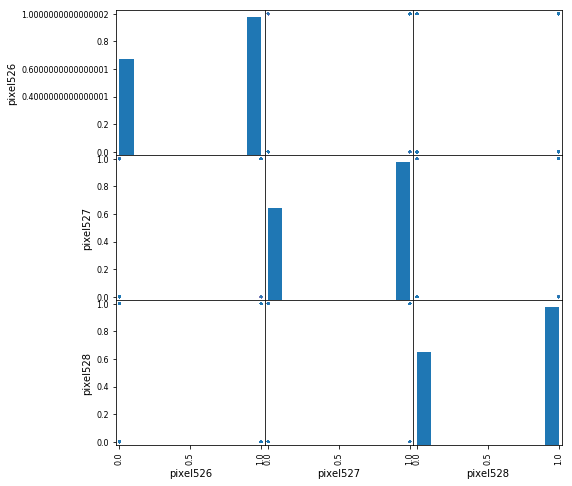

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['pixel526','pixel527', 'pixel528', 'class']], alpha = .01, figsize = (8, 8))
pass

In [10]:
data[['pixel0', 'pixel526','pixel527', 'pixel528']].corr()

,pixel0,pixel526,pixel527,pixel528
pixel0,NaN,NaN,NaN,NaN
pixel526,NaN,1.000000,0.814146,0.619017
pixel527,NaN,0.814146,1.000000,0.779742
pixel528,NaN,0.619017,0.779742,1.000000


In [11]:
data['class'] == 'z'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3380     True
3381     True
3382     True
3383     True
3384     True
3385     True
3386     True
3387     True
3388     True
3389     True
3390     True
3391     True
3392     True
3393     True
3394     True
3395     True
3396     True
3397     True
3398     True
3399     True
3400     True
3401     True
3402     True
3403     True
3404     True
3405     True
3406     True
3407     True
3408     True
3409     True
Name: class, Length: 3410, dtype: bool

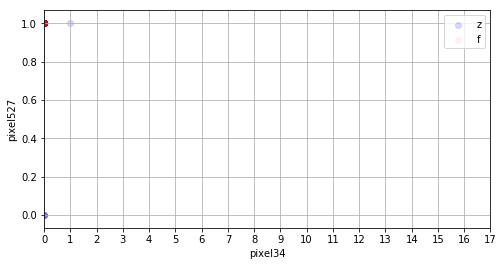

In [12]:
plt.figure(figsize = (8, 4))

plt.scatter(data[data['class'] == 'z']['pixel34'],
            data[data['class'] == 'z']['pixel527'],
            alpha = 0.15,
            label = 'z',
            color = 'b')

plt.scatter(data[data['class'] == 'f']['pixel34'],
            data[data['class'] == 'f']['pixel527'],
            alpha = 0.05,
            label = 'f',
            color = 'r')

plt.xlabel('pixel34')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('pixel527')
plt.legend()
plt.grid()

У данных графиков будет больше смысла, если уменьшить количество признаков. Например, можно посчитать для изображения гистограмму по оси x и по y, тогда получим вместо 32x32 признаков всего 64.

In [13]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns

In [14]:
print(X.shape)
print(y.shape)
N, d = X.shape

(3410, 1024)
(3410,)


Выделим тренировочные (80%) и тестовые (20%) данные.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2728 682


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.28152492668621704


In [17]:
knn = KNeighborsClassifier(n_neighbors = 2, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.15065982404692083 0.3152492668621701


In [18]:
knn = KNeighborsClassifier(n_neighbors = 3, metric='hamming')
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.15139296187683285 0.3064516129032258


In [19]:
knn = KNeighborsClassifier(n_neighbors = 4, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.17192082111436952 0.30058651026392963


In [20]:
knn = KNeighborsClassifier(n_neighbors = 6, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.19611436950146627 0.30058651026392963


In [21]:
knn = KNeighborsClassifier(n_neighbors = 8, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.21444281524926687 0.2859237536656892


In [22]:
knn = KNeighborsClassifier(n_neighbors = 12, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2313049853372434 0.28885630498533726


In [23]:
knn = KNeighborsClassifier(n_neighbors = 16, metric='hamming', n_jobs = 4)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.25 0.3035190615835777


Лучшая ошибка на тестовой выборке получилась 0.271 в случае 1 соседа. Вторая величина ошибки получилась 0.28 при числе соседей 8 (0.21 на обучающей выборке). Для классификации 62 классв, для начала такое значение сойдет. Тем более, что в dataset присутсвуют очень похожие классы - g-9, 1-i-l, o-O-0, некоторые заглавные и прописные буквы. Значения предсказаний:

In [24]:
res_test = pd.concat((pd.Series(np.array(y_test)), pd.Series(y_test_predict)), axis = 1)
res_test

,0,1
0,v,v
1,W,W
2,3,J
3,C,C
4,o,0
5,t,t
6,W,W
7,Q,O
8,f,f
9,Q,0


Запустим PCA для тренировочных данных, с числом главных компонент = 2

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
print(pca.components_)
print(pca.explained_variance_)
print(pca.singular_values_)

[[-7.95685558e-20  2.23828698e-04  8.30657250e-04 ...  2.33656113e-03
   3.78178799e-04 -8.15428432e-05]
 [-1.26606280e-17  4.96749486e-04  1.99645759e-03 ...  2.25742466e-03
   4.31103449e-04 -8.77813325e-05]]
[20.49926831 13.51355739]
[236.43499041 191.96736964]


Преобразуем тренировочные и тестовые данные в соотвествии с новым базисом и запустим kNN

In [26]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = 4)
knn.fit(X_train_pca, y_train)
y_train_predict_pca = knn.predict(X_train_pca)
y_test_predict_pca = knn.predict(X_test_pca)
err_train_pca = np.mean(y_train != y_train_predict_pca)
err_test_pca  = np.mean(y_test  != y_test_predict_pca)
print(err_train_pca)
print(err_test_pca)

0.7034457478005866
0.8533724340175953


Так как размерность задачи 32х32 признаков, то смысла использовать только 2 признака, т.е. 0.2% от всего количества признаков не имеет.

In [29]:
list_err_train = []
list_err_test = []
for n in range(16, min(32*32 + 1, X_train.shape[0] + 1), 16):
    pca = PCA(n_components=n)
    pca.fit(X)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 8, n_jobs = 4)
    knn.fit(X_train_pca, y_train)
    y_train_predict_pca = knn.predict(X_train_pca)
    y_test_predict_pca = knn.predict(X_test_pca)
    list_err_train.append(np.mean(y_train != y_train_predict_pca))
    list_err_test.append(np.mean(y_test  != y_test_predict_pca))

ValueError: x and y must have same first dimension, but have shapes (64,) and (17,)

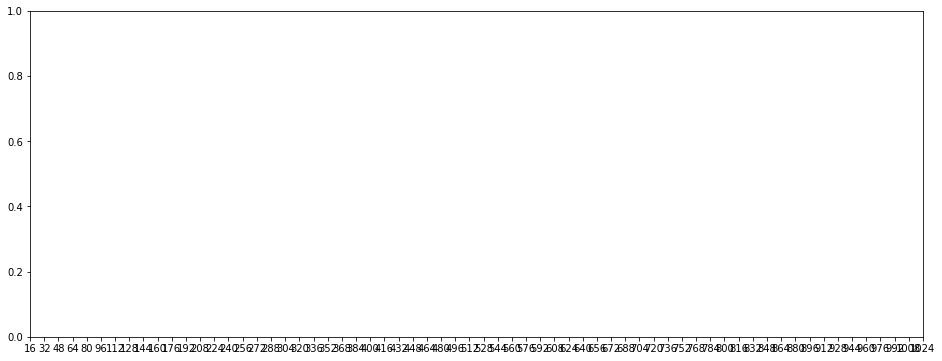

In [100]:
components = [n for n in range(16, 1024 + 1, 16)]
plt.figure(figsize = (16, 6))
plt.xticks(range(16, 1024 + 1, 16))
plt.xlim(16, 1024)
plt.plot(components, list_err_train, '-ob', label="Train error")
plt.plot(components, list_err_test, '-or', label="Test error")
plt.xlabel('n')
plt.ylabel('error')
plt.title('k=8')
plt.legend()
plt.show()

In [47]:
print(list_err_test.index(min(list_err_test))*16 + 16)

48


Построим график в окрестности n = 48

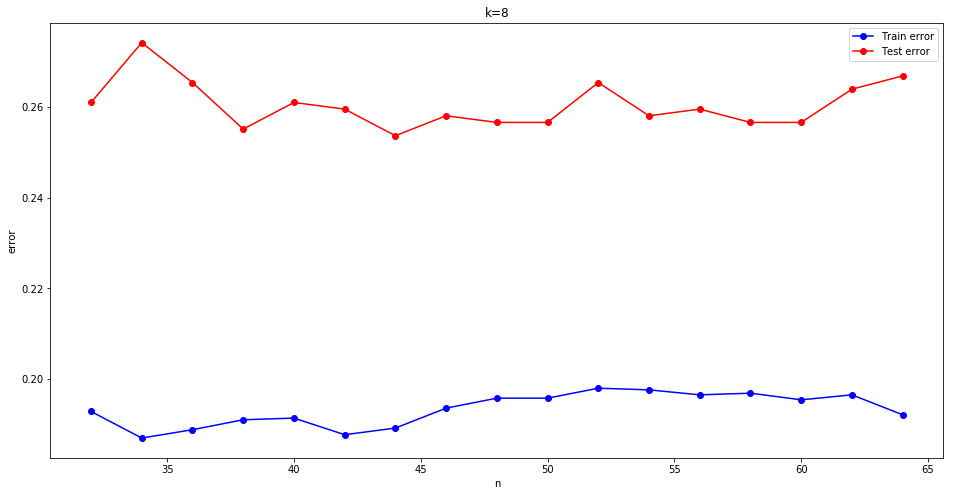

In [48]:
list_err_train = []
list_err_test = []
for n in range(32, min(64 + 1, X_train.shape[0] + 1), 2):
    pca = PCA(n_components=n)
    pca.fit(X)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 8, n_jobs = 4)
    knn.fit(X_train_pca, y_train)
    y_train_predict_pca = knn.predict(X_train_pca)
    y_test_predict_pca = knn.predict(X_test_pca)
    list_err_train.append(np.mean(y_train != y_train_predict_pca))
    list_err_test.append(np.mean(y_test  != y_test_predict_pca))

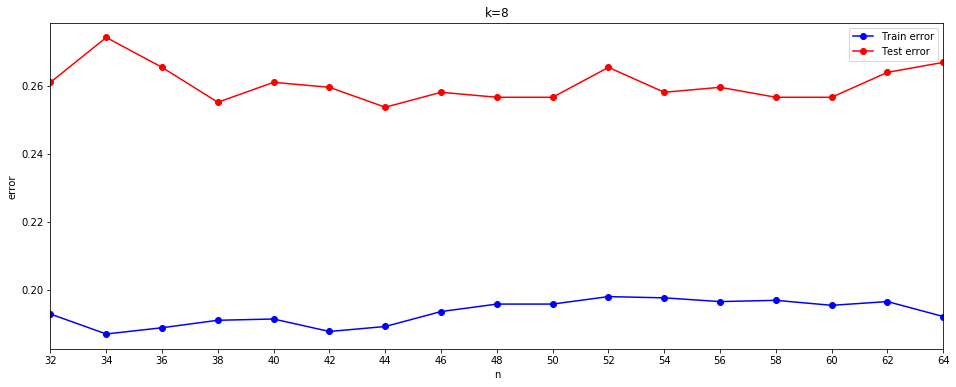

44
0.2536656891495601
0.18914956011730205


In [99]:
import pylab
from matplotlib import mlab
components = [n for n in range(32, 64 + 1, 2)]
plt.figure(figsize = (16, 6))
plt.xticks(range(32, 64 + 1, 2))
plt.xlim(32, 64)
plt.plot(components, list_err_train, '-ob', label="Train error")
plt.plot(components, list_err_test, '-or', label="Test error")

plt.xlabel('n')
plt.ylabel('error')
plt.title('k=8')
plt.legend()
plt.show()
print(list_err_test.index(min(list_err_test))*2 + 32)
print(list_err_test[6])
print(list_err_train[6])

Из рассмотренных вариантов лучшее число компонент для тестовой выборки - 44. В таком случае ошибка на тестовой выборке составляет 0.25, на обущающей выборке ошибка 0.19.

Метод главных компонент существенно уменьшил общее количество компонент (с 1024 до 44) и несколько уменьшил ошибку на тестовой выборке (с 0.28 до 0.25).